In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
#import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
import sklearn.model_selection as cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import sklearn.tree as tree
import seaborn as sns

In [2]:
original_data= pd.read_csv(r'adult_dataset_training.csv')

In [3]:
original_data.head()

Unnamed: 0  age         workclass  fnlwgt education  educational-num  \
0       26779   74  Self-emp-not-inc  119129   HS-grad                9   
1       28736   56           Private   98809   7th-8th                4   
2       19225   17         Local-gov  182070      11th                7   
3       36240   45           Private  175262       9th                5   
4       11076   30           Private  224462      11th                7   

       marital-status         occupation relationship                race  \
0  Married-civ-spouse              Sales      Husband               White   
1  Married-civ-spouse  Machine-op-inspct         Wife               White   
2       Never-married      Other-service    Own-child               White   
3  Married-civ-spouse  Handlers-cleaners      Husband  Asian-Pac-Islander   
4  Married-civ-spouse   Transport-moving      Husband               White   

   gender  capital-gain  capital-loss  hours-per-week native-country income  
0    Male             0          2149              20  United-States  <=50K  
1  Female          5013             0              45  United-States  <=50K  
2  Female             0             0              16  United-States  <=50K  
3    Male             0             0              40          India  <=50K  
4    Male             0             0              50  United-States  <=50K

In [4]:
#Fucntion to encode the categorical data
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

In [5]:
#Encode categorical data like marital status, occupation and relationship as integers
encoded_data, encoders = number_encode_features(original_data)


In [6]:
encoded_data.head()

Unnamed: 0  age  workclass  fnlwgt  education  educational-num  \
0       26779   74          6  119129         11                9   
1       28736   56          4   98809          5                4   
2       19225   17          2  182070          1                7   
3       36240   45          4  175262          6                5   
4       11076   30          4  224462          1                7   

   marital-status  occupation  relationship  race  gender  capital-gain  \
0               2          12             0     4       1             0   
1               2           7             5     4       0          5013   
2               4           8             3     4       0             0   
3               2           6             0     1       1             0   
4               2          14             0     4       1             0   

   capital-loss  hours-per-week  native-country  income  
0          2149              20              39       0  
1             0              45              39       0  
2             0              16              39       0  
3             0              40              19       0  
4             0              50              39       0

In [7]:
#Train-validation split
X_train, X_test, y_train, y_test = train_test_split(encoded_data.iloc[:, :-1], encoded_data["income"], train_size=0.8)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [8]:
# Keep pre-normalised X_test
X_test_prenorm = X_test.copy()

# Remove encoding from X_test_prenorm
for key, val in encoders.items():
    if key!='income':
        X_test_prenorm[key] = encoders[key].inverse_transform(X_test_prenorm[key])

#scaling feature variables
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype(np.float64)), columns=X_train.columns)
X_test = scaler.transform(X_test.astype(np.float64))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


F1 score: 0.541348


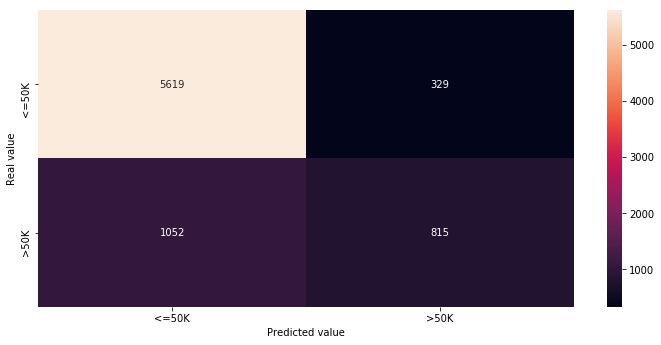

In [9]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=encoders["income"].classes_, yticklabels=encoders["income"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")
print ("F1 score: %f" % skl.metrics.f1_score(y_test, y_pred))

In [10]:
X_test_df = pd.DataFrame(X_test_prenorm)

In [11]:
X_test_df['actual_result'] = y_test

In [12]:
X_test_df.reset_index(inplace = True)

In [13]:
y_pred_df = pd.DataFrame(y_pred)

In [14]:
y_pred_df.columns = ['prediction']

In [15]:
X_test_df['prediction'] = y_pred_df['prediction']

In [16]:
X_test_df.head()

index  Unnamed: 0  age workclass  fnlwgt  education  educational-num  \
0  14264       16279   44   Private   83891  Bachelors               13   
1  37595       35354   45         ?  119835    7th-8th                4   
2  29440        4165   29   Private  114158  Bachelors               13   
3   5636       10706   64   Private  298546    HS-grad                9   
4  12227       35273   25         ?   39901  Bachelors               13   

       marital-status       occupation   relationship                race  \
0            Divorced     Adm-clerical      Own-child  Asian-Pac-Islander   
1            Divorced                ?  Not-in-family  Amer-Indian-Eskimo   
2       Never-married     Tech-support  Not-in-family               White   
3  Married-civ-spouse  Farming-fishing        Husband               White   
4  Married-civ-spouse                ?        Husband               White   

   gender  capital-gain  capital-loss  hours-per-week native-country  \
0    Male          5455             0              40  United-States   
1    Male             0             0              48  United-States   
2  Female             0             0              40  United-States   
3    Male             0             0              70  United-States   
4    Male             0             0              60  United-States   

   actual_result  prediction  
0              0           1  
1              0           0  
2              0           0  
3              0           1  
4              0           0

In [17]:
X_test_df.to_csv('test_data_with_predictions.csv')

In [18]:
y_test.head()

14264    0
37595    0
29440    0
5636     0
12227    0
Name: income, dtype: int32